In [2]:
!python ../setup.py build 

File path of setup.py: /Users/hyunseongkim/Documents/GitHub/Org_OptTrot/OptTrot
/Users/hyunseongkim/Documents/GitHub/Org_OptTrot/OptTrot/opttrot
['/Users/hyunseongkim/Documents/GitHub/Org_OptTrot/OptTrot/opttrot/c_src/pauli_c.c', '/Users/hyunseongkim/Documents/GitHub/Org_OptTrot/OptTrot/opttrot/c_src/pauli_bn/pauli_bn.c', '/Users/hyunseongkim/Documents/GitHub/Org_OptTrot/OptTrot/opttrot/c_src/pauli_bn/pauli_bn_methods.c', '/Users/hyunseongkim/Documents/GitHub/Org_OptTrot/OptTrot/opttrot/c_src/pauli_bn/pauli_bn_utils.c', '/Users/hyunseongkim/Documents/GitHub/Org_OptTrot/OptTrot/opttrot/c_src/bn/bn.c', '/Users/hyunseongkim/Documents/GitHub/Org_OptTrot/OptTrot/opttrot/c_src/bn/bn_ext.c', '/Users/hyunseongkim/Documents/GitHub/Org_OptTrot/OptTrot/opttrot/c_src/bn/bn_python.c']
['/Users/hyunseongkim/Documents/GitHub/Org_OptTrot/OptTrot/opttrot/c_src/pauli_c.c', '/Users/hyunseongkim/Documents/GitHub/Org_OptTrot/OptTrot/opttrot/c_src/pauli_bn/pauli_bn.c', '/Users/hyunseongkim/Documents/GitHub/

In [3]:
!python ../setup.py build_ext --inplace

File path of setup.py: /Users/hyunseongkim/Documents/GitHub/Org_OptTrot/OptTrot
/Users/hyunseongkim/Documents/GitHub/Org_OptTrot/OptTrot/opttrot
['/Users/hyunseongkim/Documents/GitHub/Org_OptTrot/OptTrot/opttrot/c_src/pauli_c.c', '/Users/hyunseongkim/Documents/GitHub/Org_OptTrot/OptTrot/opttrot/c_src/pauli_bn/pauli_bn.c', '/Users/hyunseongkim/Documents/GitHub/Org_OptTrot/OptTrot/opttrot/c_src/pauli_bn/pauli_bn_methods.c', '/Users/hyunseongkim/Documents/GitHub/Org_OptTrot/OptTrot/opttrot/c_src/pauli_bn/pauli_bn_utils.c', '/Users/hyunseongkim/Documents/GitHub/Org_OptTrot/OptTrot/opttrot/c_src/bn/bn.c', '/Users/hyunseongkim/Documents/GitHub/Org_OptTrot/OptTrot/opttrot/c_src/bn/bn_ext.c', '/Users/hyunseongkim/Documents/GitHub/Org_OptTrot/OptTrot/opttrot/c_src/bn/bn_python.c']
['/Users/hyunseongkim/Documents/GitHub/Org_OptTrot/OptTrot/opttrot/c_src/pauli_c.c', '/Users/hyunseongkim/Documents/GitHub/Org_OptTrot/OptTrot/opttrot/c_src/pauli_bn/pauli_bn.c', '/Users/hyunseongkim/Documents/GitHub/

In [3]:
import os, sys
sys.path.append("..")

## PauliElement 

In [4]:
from opttrot.pauli import PauliElement
from opttrot.pauli_c import _bignum_bytes

In [5]:
_bignum_bytes()

512

In [6]:
from opttrot.pauli_c import PauliElement

In [7]:
help(PauliElement)

Help on class PauliElement:

class PauliElement(builtins.object)
 |  Basic Pauli element
 |
 |  Methods defined here:
 |
 |  __add__(self, value, /)
 |      Return self+value.
 |
 |  __eq__(self, value, /)
 |      Return self==value.
 |
 |  __ge__(self, value, /)
 |      Return self>=value.
 |
 |  __gt__(self, value, /)
 |      Return self>value.
 |
 |  __hash__(self, /)
 |      Return hash(self).
 |
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  __le__(self, value, /)
 |      Return self<=value.
 |
 |  __lt__(self, value, /)
 |      Return self<value.
 |
 |  __matmul__(self, value, /)
 |      Return self@value.
 |
 |  __mul__(self, value, /)
 |      Return self*value.
 |
 |  __ne__(self, value, /)
 |      Return self!=value.
 |
 |  __radd__(self, value, /)
 |      Return value+self.
 |
 |  __repr__(self, /)
 |      Return repr(self).
 |
 |  __rmatmul__(self, value, /)
 |      Return value@self.
 |
 |  __rmul__(self,

## Pauli string test

Error: work well for <32 but error for >=32.

In [6]:
n = 32
p00 = PauliElement(nx=30, nz= 6, n=n, weight=0.124)
p01 = PauliElement(nx=5, nz= 5, n=n, weight=0.124)
print(len(p00.pstr), len(p01.pstr))


4 4


In [7]:
p00

PauliElement(n=32, weight=0.124000+(0.000000)j, XYYI)

## Speed comparsion

In [8]:
from numbers import Number
from functools import reduce
import numpy as np

## Compare with Qiskit

In [9]:
def to_qiskit(self):
    from qiskit.quantum_info import Pauli as qiskit_Pauli
    x_array = np.flip(np.array([int(b) for b in format(self.nx, f"0{self.n}b")], dtype=np.uint))
    z_array = np.flip(np.array([int(b) for b in format(self.nz, f"0{self.n}b")], dtype=np.uint))
    return self.weight, qiskit_Pauli((z_array, x_array))

In [10]:
p00 = PauliElement(nx=3, nz= 6, n=n, weight=0.124)
p01 = PauliElement(nx=5, nz= 5, n=n, weight=0.124)
w00, q_p00 = to_qiskit(p00)
w01, q_p01 = to_qiskit(p01)


In [11]:
q_p00.compose(q_p01)

Pauli('IIIIIIIIIIIIIIIIIIIIIIIIIIIIIXYZ')

In [12]:
p02= p00@p01
p02.pstr

'IXYZ'

## Speed

### Qiskit

In [13]:
%%timeit
q_p00.compose(q_p01)

28.1 µs ± 342 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### OptTrot

In [14]:
%%timeit
p00@p01

1.39 µs ± 9.93 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


### Numpy binary

In [15]:
import numpy as np

nx1= np.random.randint(0, 2, size=n, dtype=bool)
nz1= np.random.randint(0, 2, size=n, dtype=bool)
nx2= np.random.randint(0, 2, size=n, dtype=bool)
nz2= np.random.randint(0, 2, size=n, dtype=bool)
f1 = 3
f2 = 4


In [16]:
%%timeit
nx3 = np.bitwise_xor(nx1, nx2)
nz3 = np.bitwise_xor(nz1, nz2)
f3 = f1+f2 + 2*np.bitwise_and(nx1, nz2).astype(int).sum() -  np.bitwise_and(nx3, nz3).astype(int).sum()

11.6 µs ± 161 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### Result

- OS: Windows
- CPU: Ryzen 5 
- Python: 3.11.8


|Qiskit| OptTrot| Nb|
|:--:|:--:|:--:|
|27.9 µs ± 1.38 µs|1.35 µs ± 25.2 ns|11.4 µs ± 102 ns|

- OS: Mac
- CPU: M2
- Python 3.12.4

|Qiskit| OptTrot| Nb|
|:--:|:--:|:--:|
|7.92 µs ± 262 ns|675 ns ± 25.2 ns|6.48 µs ± 96 ns|


## Algebra

### Add

$$0.5 YZ, 0.5 * (-)YZ$$

In [17]:
n = 2
p1  = PauliElement(2, 3, n, 0.5)
p1f = PauliElement(2, 3, n, 0.5)
p2f = PauliElement(2, 3, n, 0.25)
p3f = PauliElement(2, 3, n, 0.25)

In [18]:
p1.f, p1f.f

(1, 1)

In [19]:
p1+p1f # must be 1 YZ

PauliElement(n=2, weight=1.000000+(0.000000)j, YZ)

In [20]:
p1+p2f

PauliElement(n=2, weight=0.750000+(0.000000)j, YZ)

In [21]:
p1+p3f # (0.5 + 0.25i) YZ

PauliElement(n=2, weight=0.750000+(0.000000)j, YZ)

In [22]:
p1+p1 # YZ

PauliElement(n=2, weight=1.000000+(0.000000)j, YZ)

### Mul

In [23]:
pm1 = PauliElement(3, 3, 4, 0.5)
pm1

PauliElement(n=4, weight=0.500000+(0.000000)j, IIYY)

In [24]:
5*pm1

PauliElement(n=4, weight=2.500000+(0.000000)j, IIYY)

In [25]:
pm1*5

PauliElement(n=4, weight=2.500000+(0.000000)j, IIYY)

In [26]:
5j*pm1

PauliElement(n=4, weight=0.000000+(2.500000)j, IIYY)

In [27]:
pm1*5j

PauliElement(n=4, weight=0.000000+(2.500000)j, IIYY)

In [28]:
p1f

PauliElement(n=2, weight=0.500000+(0.000000)j, YZ)

In [29]:
p1f.f

1

#### Phase test

|$P_0$|$P_1$|$P_2$|Phase|
|:---:|:---:|:---:|:---:|
|  X  |  X  |  I  |1    |
|  X  |  Y  |  Z  |i    |
|  X  |  Z  |  Y  |-i   |
|  Y  |  X  |  Z  |-i    |
|  Y  |  Y  |  I  |1    |
|  Y  |  Z  |  X  |i    |
|  Z  |  X  |  Y  |i    |
|  Z  |  Y  |  X  |-i   |
|  Z  |  Z  |  I  |1    |


In [30]:
from itertools import product

In [31]:
px = PauliElement(nx=1,nz=0, n=1, weight= 1)
pz = PauliElement(nx=0,nz=1, n=1, weight= 1)
py = PauliElement(nx=1,nz=1, n=1, weight= 1)
ps = [px, py, pz]

In [34]:
for (p1, p2) in product(ps, ps):
    p3 = (p1@p2)
    print(f"{p1.pstr} , {p2.pstr} = \t({p3.weight})\t{p3.pstr}")

X , X = 	((1+0j))	I
X , Y = 	(1j)	Z
X , Z = 	(-1j)	Y
Y , X = 	(-1j)	Z
Y , Y = 	((1+0j))	I
Y , Z = 	(1j)	X
Z , X = 	(1j)	Y
Z , Y = 	(-1j)	X
Z , Z = 	((1+0j))	I



$$(-i)^1 Y * (-i)^3 Y = I$$
$$(-i)^2 Y * (-i)^3 Y = -i I$$

In [35]:
py0 = PauliElement(nx=1,nz=1, n=1, weight= 1)
py1 = PauliElement(nx=1,nz=1, n=1, weight= -1j)
py2 = PauliElement(nx=1,nz=1, n=1, weight= -1)
py3 = PauliElement(nx=1,nz=1, n=1, weight= 1j)

In [36]:
py1@py3

PauliElement(n=1, weight=1.000000+(0.000000)j, I)

In [37]:
py2@py3

PauliElement(n=1, weight=0.000000+(-1.000000)j, I)

### Commute relationship

In [38]:
pxx = PauliElement(3,0, 3, 1)
pyx = PauliElement(3,2, 3, 1)
print(pxx, pyx)

IXX IYX


In [39]:
pxx.commute(pyx), pyx.commute(pxx)

(False, False)

In [40]:
pyx@pxx  - pxx@pyx

PauliElement(n=3, weight=0.000000+(-2.000000)j, IZI)

In [41]:
pxx = PauliElement(3,0, 3, 1)
pyy = PauliElement(3,3, 3, 1)
print(pxx, pyy)

IXX IYY


In [42]:
pxx.commute(pyy), pxx.commute(pyy) # True

(True, True)

In [43]:
pxx@pyy - pyy@pxx

PauliElement(n=3, weight=0.000000+(0.000000)j, IZZ)

## PauliPoly routine design

1. Numpy array
2. dict and set
3. CSR matrix, row, col, values

### Numpy Array test

In [47]:
import os, sys
sys.path.append("..")

In [6]:
from opttrot.pauli import PauliElement
from opttrot.pauli import PauliPoly

import numpy as np

In [7]:
n = 3
plist1 = [
    PauliElement(3, 5, n, 1),
    PauliElement(3, 1, n, 1),
    PauliElement(0, 4, n, 1),
    PauliElement(4, 2, n, 1),
]
plist2 = [
    PauliElement(1, 1, n, 1),
    PauliElement(3, 0, n, 1),
    PauliElement(2, 2, n, 1),
    PauliElement(2, 5, n, 1),
    PauliElement(4, 4, n, 1),
    PauliElement(3, 5, n, 1),
    PauliElement(3, 1, n, 1),
]

In [8]:
p_arr = np.array(plist1)
p_poly = PauliPoly(plist1)
p_arr2 = np.array(plist2)

In [9]:
p_arr.sort()

In [10]:
p_arr

array([PauliElement(n=3, weight=1.000000+(0.000000)j, ZII),
       PauliElement(n=3, weight=1.000000+(0.000000)j, IXY),
       PauliElement(n=3, weight=1.000000+(0.000000)j, ZXY),
       PauliElement(n=3, weight=1.000000+(0.000000)j, XZI)], dtype=object)

In [11]:
pmat = p_poly.matrix

In [12]:
%%timeit
-0.25j*pmat

523 ns ± 24.8 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [13]:
%%timeit
-0.25j*p_arr

2.11 μs ± 242 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [14]:
%%timeit
pmat + pmat + pmat

609 ns ± 6.74 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [15]:
%%timeit
p_arr+ p_arr + p_arr

2.15 μs ± 187 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [16]:
np.intersect1d(p_arr, p_arr2)

array([PauliElement(n=3, weight=1.000000+(0.000000)j, IXY),
       PauliElement(n=3, weight=1.000000+(0.000000)j, ZXY)], dtype=object)

In [17]:
np.setxor1d(p_arr, p_arr2)

array([PauliElement(n=3, weight=1.000000+(0.000000)j, ZII),
       PauliElement(n=3, weight=1.000000+(0.000000)j, IIY),
       PauliElement(n=3, weight=1.000000+(0.000000)j, IYI),
       PauliElement(n=3, weight=1.000000+(0.000000)j, ZXZ),
       PauliElement(n=3, weight=1.000000+(0.000000)j, IXX),
       PauliElement(n=3, weight=1.000000+(0.000000)j, XZI),
       PauliElement(n=3, weight=1.000000+(0.000000)j, YII)], dtype=object)

In [18]:
p_arr@p_arr2

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 7 is different from 4)

In [ ]:
%%timeit
p_arr+ p_arr

2.15 μs ± 36.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [ ]:
%%timeit
p_arr + PauliElement(3, 5, n, 1)

5.24 μs ± 30 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [ ]:
PauliElement(3, 4, n, 1) + PauliElement(3, 5, n, 1)

PauliElement(n=3, weight=1.000000+(0.000000)j, ZXX)

In [20]:
p_arr 

array([PauliElement(n=3, weight=1.000000+(0.000000)j, ZII),
       PauliElement(n=3, weight=1.000000+(0.000000)j, IXY),
       PauliElement(n=3, weight=1.000000+(0.000000)j, ZXY),
       PauliElement(n=3, weight=1.000000+(0.000000)j, XZI)], dtype=object)

In [21]:
p_arr + PauliElement(3, 5, n, 1)

array([PauliElement(n=3, weight=1.000000+(0.000000)j, ZII),
       PauliElement(n=3, weight=1.000000+(0.000000)j, IXY),
       PauliElement(n=3, weight=1.000000+(0.000000)j, ZXY),
       PauliElement(n=3, weight=1.000000+(0.000000)j, XZI)], dtype=object)

## PauliPoly

1. Summation Poly + poly
2. Scalar product
3. Matrix product
4. Matrix transformation

In [22]:
import os, sys
sys.path.append("..")

In [23]:
from opttrot.pauli import PauliElement, PauliPoly

In [24]:
n =10
plist = [
    PauliElement(3, 5, n, 1),
    PauliElement(3, 1, n, 1),
    PauliElement(0, 4, n, 1),
    PauliElement(4, 2, n, 1),
    PauliElement(3, 5, n, 1),
    PauliElement(1, 1, n, 1),
    PauliElement(3, 0, n, 1),
    PauliElement(2, 2, n, 1),
    PauliElement(2, 5, n, 1),
    PauliElement(4, 4, n, 1),
]
plist

[PauliElement(n=10, weight=1.000000+(0.000000)j, IIIIIIIZXY),
 PauliElement(n=10, weight=1.000000+(0.000000)j, IIIIIIIIXY),
 PauliElement(n=10, weight=1.000000+(0.000000)j, IIIIIIIZII),
 PauliElement(n=10, weight=1.000000+(0.000000)j, IIIIIIIXZI),
 PauliElement(n=10, weight=1.000000+(0.000000)j, IIIIIIIZXY),
 PauliElement(n=10, weight=1.000000+(0.000000)j, IIIIIIIIIY),
 PauliElement(n=10, weight=1.000000+(0.000000)j, IIIIIIIIXX),
 PauliElement(n=10, weight=1.000000+(0.000000)j, IIIIIIIIYI),
 PauliElement(n=10, weight=1.000000+(0.000000)j, IIIIIIIZXZ),
 PauliElement(n=10, weight=1.000000+(0.000000)j, IIIIIIIYII)]

In [25]:
ppoly = PauliPoly(plist)
ppoly

PauliPoly(terms:9)[
((1+0j), 'IIIIIIIZII'),
((1+0j), 'IIIIIIIIIY'),
((1+0j), 'IIIIIIIIYI'),
((1+0j), 'IIIIIIIZXZ'),
((1+0j), 'IIIIIIIIXX'),
((1+0j), 'IIIIIIIIXY'),
((2+0j), 'IIIIIIIZXY'),
((1+0j), 'IIIIIIIXZI'),
((1+0j), 'IIIIIIIYII')
]

### Add

In [26]:
PauliElement(0,0, n, 1)

PauliElement(n=10, weight=1.000000+(0.000000)j, IIIIIIIIII)

In [27]:
ppoly + PauliElement(0,0, n, 1) 

PauliPoly(terms:10)[
((1+0j), 'IIIIIIIIII'),
((1+0j), 'IIIIIIIZII'),
((1+0j), 'IIIIIIIIIY'),
((1+0j), 'IIIIIIIIYI'),
((1+0j), 'IIIIIIIZXZ'),
((1+0j), 'IIIIIIIIXX'),
((1+0j), 'IIIIIIIIXY'),
((2+0j), 'IIIIIIIZXY'),
((1+0j), 'IIIIIIIXZI'),
((1+0j), 'IIIIIIIYII')
]

In [28]:
ppoly

PauliPoly(terms:9)[
((1+0j), 'IIIIIIIZII'),
((1+0j), 'IIIIIIIIIY'),
((1+0j), 'IIIIIIIIYI'),
((1+0j), 'IIIIIIIZXZ'),
((1+0j), 'IIIIIIIIXX'),
((1+0j), 'IIIIIIIIXY'),
((2+0j), 'IIIIIIIZXY'),
((1+0j), 'IIIIIIIXZI'),
((1+0j), 'IIIIIIIYII')
]

In [29]:
3*ppoly 

PauliPoly(terms:9)[
((3+0j), 'IIIIIIIZII'),
((3+0j), 'IIIIIIIIIY'),
((3+0j), 'IIIIIIIIYI'),
((3+0j), 'IIIIIIIZXZ'),
((3+0j), 'IIIIIIIIXX'),
((3+0j), 'IIIIIIIIXY'),
((6+0j), 'IIIIIIIZXY'),
((3+0j), 'IIIIIIIXZI'),
((3+0j), 'IIIIIIIYII')
]

In [30]:
%%timeit
pmat = ppoly.matrix

2.61 s ± 40.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [31]:
import numpy as np

In [32]:
np.ones(pmat.shape)

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

In [33]:
from qiskit.quantum_info import SparsePauliOp

### Sample pmatrix

## Matrix construction routine

In [97]:
from importlib import reload
import ten_con
reload(ten_con)
from ten_con import _mat_to_coef_mat, _coef_to_mat

In [98]:
from opttrot.pauli_utils import get_pstrs, pstr2sym_code

In [99]:
pstr2sym_code("XIY")

(5, 1)

In [196]:
pl = []
n = 10
pstrs = get_pstrs(n)
l = len(pstrs)
part = 4
pstrs = pstrs[:int(l/part)]
for p in pstrs:
    nx, nz = pstr2sym_code(p)
    pl.append(PauliElement(nx=nx, nz=nz, n =n, weight=1))

In [197]:
sample_ppoly = PauliPoly(pl)


In [198]:
pmat = sample_ppoly.matrix
cmat = sample_ppoly.coef_matrix

In [199]:
import matplotlib.pyplot as plt

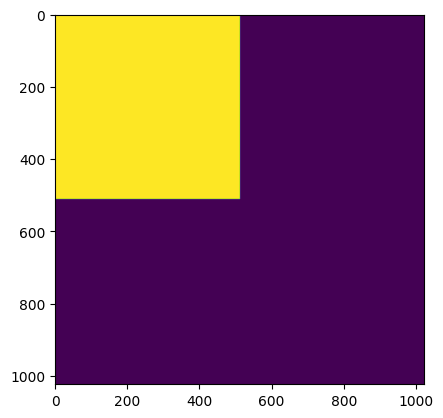

In [200]:
plt.imshow(cmat.real)

In [201]:
np.sum(cmat), l/part

((262144+0j), 262144.0)

In [202]:
from copy import deepcopy

In [203]:
pmat2 = deepcopy(pmat)

In [204]:
%%timeit
sp1 = SparsePauliOp.from_operator(pmat2) # Using a rust module including parallelism.

38.9 ms ± 489 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [205]:
pmat2 = deepcopy(pmat)

In [206]:
%%timeit
mat = _mat_to_coef_mat(pmat2)

115 ms ± 475 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [209]:
sp = SparsePauliOp.from_operator(pmat2)


In [210]:
sp

SparsePauliOp([],
              coeffs=[])

In [211]:
cmat = sample_ppoly.coef_matrix

In [212]:
%%timeit
omat = sp.to_matrix()

601 μs ± 24.5 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [213]:
%%timeit
omat = _coef_to_mat(cmat)

121 ms ± 553 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [214]:
np.sum(cmat)

-2.6442238751609944e+123j

## Dict type Pauli Poly

In [ ]:
from __future__ import annotations
from typing import *
from numbers import Number

import numpy as np

from opttrot.pauli_c import PauliElement
from opttrot.pauli_utils import (
    FLT_EPS, ij_code2sym_code,
    pauli_to_pennylane,
    pauli_to_qiskit,
    pstr2sym_code,
    )

### Side: Dict intersection

In [26]:
td = {}
td2 = {}
td[(1,2)] = 1
td[(2,3)] = 2
td[(1,4)] = 3

td2[(1,2)] = 1
td2[(2,3)] = 2
td2[(1,8)] = 3

In [27]:
print("Union: ", td.keys()|td2.keys()) # union
print("Intersection: ", td.keys()&td2.keys()) # intersection
print("Negation 1: ", td.keys() - td2.keys()) # negation
print("Negation 2: ", td2.keys() - td.keys()) # negation
print("Complement: ", td.keys() ^ td2.keys()) # complements of intersection

Union:  {(2, 3), (1, 8), (1, 2), (1, 4)}
Intersection:  {(2, 3), (1, 2)}
Negation 1:  {(1, 4)}
Negation 2:  {(1, 8)}
Complement:  {(1, 8), (1, 4)}


In [28]:
from copy import copy

In [29]:
class PauliPoly:
    def __init__(self, 
                 pauli_list:Iterable[PauliElement], 
                 coefs:Union[None, Iterable[Number]]=None
                 ):
        
        if isinstance(coefs, Iterable) and not isinstance(coefs, str):
            for (p, coef) in zip(pauli_list, coefs):
                p.weight = coef
        pauli_list = sorted(pauli_list)
        n_test = pauli_list[0].n
        self._terms = {}
        self.n = 0
        for i, p in enumerate(pauli_list):
            if n_test != p.n:
                raise ValueError(f"The dimension of {i} object does not match with first PauliElement object.")
            if p.sym_code in self._terms.keys():
                self._terms[p.sym_code] = self._terms[p.sym_code]+ p
            else:
                self._terms[p.sym_code] = p
        self.n = n_test
        #self._terms = list(pauli_list)#set
        #self._terms.sort()

        #iteration routine
        self._iter_current = 0
    
    @classmethod
    def from_coef_mat(cls, coef_mat:np.matrix, tol=FLT_EPS):
        n, m = coef_mat.shape
        qubits = int(np.log2(n))
        p_list = []
        for i in range(n):
            for j in range(m):
                if np.abs(coef_mat[i, j]) <tol: 
                    continue
                x, z = ij_code2sym_code(i, j)
                p_list.append(PauliElement(nx=x, nz=z, n=qubits, weight=coef_mat[i, j].real))
        return cls(p_list) # convert from list
    @classmethod
    def from_matrix(cls, H:np.matrix, tol=FLT_EPS):
        # Tensorized decomposition See Hantzko et al, 2023.
        mat = copy(H)
        n1, n2 = mat.shape
        assert n1 == n2, "The given matrix must be a square matrix."
        n= int(np.log2(n1))
        l = n1
        for i in range(n):
            m = int(2**i) # Number of submatrix
            l = int(l/2) # Sub matrix size, square
            for j in range(m):
                for k in range(m):
                    num_i = j*(2*l) # Initial position of sub matrix row
                    num_j = k*(2*l) # Initial position of sub matrix column
                    # I-Z
                    mat[num_i: num_i+l, num_j:num_j+l]        += mat[num_i+l: num_i+2*l, num_j+l:num_j+2*l] 
                    mat[num_i+l: num_i+2*l, num_j+l:num_j+2*l] = mat[num_i: num_i+l, num_j:num_j+l] - 2*mat[num_i+l: num_i+2*l, num_j+l:num_j+2*l]
                    # X-Y
                    mat[num_i: num_i+l, num_j+l:num_j+2*l] += mat[num_i+l: num_i+2*l, num_j:num_j+l] 
                    mat[num_i+l: num_i+2*l, num_j:num_j+l] =  mat[num_i: num_i+l, num_j+l:num_j+2*l] - 2*mat[num_i+l: num_i+2*l, num_j:num_j+l]
                    mat[num_i+l: num_i+2*l, num_j:num_j+l] *= 1j # 1j 이 맞는 거 같은데

        mat *= (1/(2**n))
        return cls.from_coef_mat(mat, tol=tol)
    @property
    def terms(self):
        return [(p.weight, p.pstr) for p in self._terms.values()] # convert to list and sort
    @property
    def coefficients(self):
        return [p.weight for p in self._terms.values()]
    @property
    def poly(self):
        return self._terms.values() # convert to list
    @property
    def coef_matrix(self):
        n = self.n
        nn = 2**n
        mat = np.zeros((nn, nn), dtype=complex)
        for p in self._terms.values(): # change from dict, key
            mat[*p.ij_code] = p.weight
        return mat
    
    def __str__(self):
        return f"Pauli polynomial of {self.n} qubit space."
    def __repr__(self):
        st = f"PauliPoly(terms:{len(self._terms)})[\n"
        st_term = ",\n".join([p.__repr__() for p in self.terms])
        return st + st_term+"\n]"

    def __rmul__(self, other:Number):
        for k in self._terms.keys(): #convert to dict routine
            self._terms[k]= other * self._terms[k]
        return self
    def __add__(self, other: Union[PauliElement, PauliPoly]):
        if isinstance(other, PauliElement): # Use in and & operator
            p = PauliPoly([other])
        else:
            p = other
        self._terms.keys()
        
        # if len(terms) > tolerance # using a matrix method.
        mat = self.coef_matrix + p.coef_matrix
        return PauliPoly.from_coef_mat(mat)
    
    def __matmul__(self, other:PauliPoly):
        n = self.n
        nn = 2**n
        coef_mat = np.zeros((nn, nn), dtype=complex)
        pauli_set = set([])
        # If two poly has more than 50 % terms,
        # it is wise to calculate coef matrix multiplication
        for pi in self.poly:
            for pj in other.poly:
                p = pi@pj
                if p.sym_code in pauli_set:
                     coef_mat[*p.sym_code] += p.weight
                     pauli_set.add(p.sym_code)
                else:
                     coef_mat[*p.sym_code] = p.weight
        return PauliPoly.from_coef_mat(coef_mat)
    
    # Coefficient routines
    #def __neg__(self): Return new element
    #    for p in self._terms:
    #        p.coef = -(p.coef)
    #def __abs__(self):
    #    for p in self._terms:
    #        p.coef = abs(p.coef)
    # Index access ----------------------------------
    def __getitem__(self, key):
        return self._terms[key]
    def __setitem__(self, key, value:PauliElement):
        self._terms[key] = value
    #def __deltiem__(self):
    #    pass

    # Iteration
    def __iter__(self):
        return self
    def __next__(self):
        if self._iter_current >= len(self._terms):
            self._iter_current = 0
            raise StopIteration
        result = self._terms[self._iter_current]
        self._iter_current += 0 if self._iter_current == len(self._terms) else 1
        return result
    # Matrix form
    @property
    def matrix(self):
        #Tensrosized reconstruction method: O(8^n)
        # Normal method: O(16^n)
        # mat = np.zeros(self.coef_matrix.shape) 
        # for p in self.poly:
        #   mat += p.coef*p.matrix
        mat = self.coef_matrix

        _2n = self.coef_matrix.shape[0] # 2^n
        steps = int(np.log2(_2n)) #n
        unit_size = 1

        for step in range(steps):
            step1 = step+1
            mat_size = int(2*unit_size)
            indexes = np.arange(_2n/(2**step1)).astype(int)
            indexes_ij = (mat_size * indexes)

            for i in indexes_ij:
                for j in indexes_ij:
                    # (i, j)
                    r1i     = i
                    r1f2i   = r1i + unit_size
                    r2f     = r1f2i + unit_size

                    c1i     = j
                    c1f2i   = c1i + unit_size
                    c2f     = c1f2i + unit_size

                    #print(r1i, r1f2i, r2f, c1i, c1f2i , c2f)
                    # I - Z
                    coef = 1
                    mat[r1i: r1f2i, c1i:c1f2i] = mat[r1i: r1f2i, c1i:c1f2i] + coef*mat[r1f2i: r2f, c1f2i:c2f]
                    mat[r1f2i: r2f, c1f2i:c2f] = mat[r1i: r1f2i, c1i:c1f2i] -2*coef *mat[r1f2i: r2f, c1f2i:c2f]
                    # X -Y
                    #coef = -1j
                    #mat[r1f2i: r2f, c1i:c1f2i] = mat[r1f2i: r2f, c1i:c1f2i]  + coef*mat[r1i: r1f2i, c1f2i:c2f]
                    #mat[r1i: r1f2i, c1f2i:c2f] = mat[r1f2i: r2f, c1i:c1f2i] -2*coef*mat[r1i: r1f2i, c1f2i:c2f]
                    coef = -1j
                    mat[r1i: r1f2i, c1f2i:c2f] = mat[r1i: r1f2i, c1f2i:c2f]  + coef*mat[r1f2i: r2f, c1i:c1f2i]
                    mat[r1f2i: r2f, c1i:c1f2i] = mat[r1i: r1f2i, c1f2i:c2f] -2*coef*mat[r1f2i: r2f, c1i:c1f2i]
            # Using slice to simplify the routine.
            # I-Z
            #mat[0:_2n:unit_size, 0:_2n:unit_size] += mat[unit_size:_2n:unit_size, unit_size:_2n:unit_size]
            #mat[unit_size:_2n:unit_size, unit_size:_2n:unit_size] = mat[0:_2n:unit_size, 0:_2n:unit_size]-2*coef *mat[unit_size:_2n:unit_size, unit_size:_2n:unit_size]
            # X-Y
            #mat[0:_2n:unit_size, unit_size:_2n:unit_size] += (-1j)*mat[unit_size:_2n:unit_size, 0:_2n:unit_size]
            #mat[unit_size:_2n:unit_size, 0:_2n:unit_size] = mat[0:_2n:unit_size, unit_size:_2n:unit_size]+2j*mat[unit_size:_2n:unit_size, 0:_2n:unit_size]
            
            unit_size *=2
        return mat
    def add(self, p: Union[PauliElement, PauliPoly]):
        if isinstance(p, PauliElement): # Use in and & operator
            if p in self._terms.keys():
                self._terms[p.sym_code] = self._terms[p.sym_code] + p
            else:
                self._terms[p.sym_code] = p
        if isinstance(p, PauliPoly):
            # Intersection
            for p_t in (self._terms.keys()&p._terms.keys()):
                self._terms[p_t.sym_code] = self._terms[p_t.sym_code] + p_t
            # Complement
            for p_t in (p._terms.keys()-self._terms.keys()):
                self._terms[p_t.sym_code] = p_t
        # if len(terms) > tolerance # using a matrix method.
        #mat = self.coef_matrix + p.coef_matrix
        #return PauliPoly.from_coef_mat(mat)
    # Interface to other packages
    def to_pennylane(self, except_zero=True):
        from pennylane.pauli import PauliSentence
        pdict = {}
        for p in self._terms.values():
            if except_zero:
                if p.x == p.z and p.z==0:
                    continue
            coef, pauli = pauli_to_pennylane(p)
            pdict[pauli] = coef
        return PauliSentence(pdict)
    def to_qiskit(self, with_list=False):
        coefs = []
        paulis = []
        for p in self._terms.values():
            coef, pauli = pauli_to_qiskit(p)
            coefs.append(coef)
            paulis.append(pauli)
        if with_list:
            from qiiskit.quantum_info import PauliList
            paulis = PauliList(paulis)
        return coefs, paulis

NameError: name 'Iterable' is not defined

## Matrix conversion routine test

In [23]:
from opttrot.pauli_utils import pstr2mat, get_pstrs
from opttrot.utils import fro_inner

### Matrix to Poly

In [24]:
N= 3
m_dim = 2**N
M1 = np.matrix(np.random.rand(m_dim, m_dim).astype(complex))
M2 = np.matrix(np.random.rand(m_dim, m_dim).astype(complex))
M = M1 + 1j*M2
H = M.H@M

In [25]:
#Decompose with inner product
pstrs = get_pstrs(N)
decompose = {}
for p in pstrs:
    pmat = np.matrix(pstr2mat(p))
    c = fro_inner(H, pmat)
    decompose[p] = c
decompose

{'III': (6.104424437417665+1.0635781691278442e-17j),
 'IIX': (4.697459966851696-6.245004513516506e-17j),
 'IIY': (0.11870804061617737+0j),
 'IIZ': (0.11865047549324848+2.6095099858598466e-17j),
 'IXI': (4.718910891144114+0j),
 'IXX': (4.781727832572292+0j),
 'IXY': (0.5748227062882564+0j),
 'IXZ': (-0.16637475388355405+5.551115123125783e-17j),
 'IYI': (0.27232105353783675+0j),
 'IYX': (0.21428704722438768+0j),
 'IYY': (0.23051597750021857-1.1102230246251565e-16j),
 'IYZ': (0.07149878333353224+0j),
 'IZI': (-0.1872405574131708-1.1033287763136837e-17j),
 'IZX': (-0.15431399719920158+6.245004513516506e-17j),
 'IZY': (0.08448548440180237+0j),
 'IZZ': (-0.07075363994977568+1.971420059687701e-18j),
 'XII': (4.6600399648277255-8.673617379884035e-19j),
 'XIX': (4.735874170176852+4.163336342344337e-17j),
 'XIY': (0.4168104030168422+0j),
 'XIZ': (-0.12453076365651339-2.688821387764051e-17j),
 'XXI': (5.005902050262941-2.7755575615628914e-17j),
 'XXX': (4.824732054545019+6.938893903907228e-18j),


In [26]:
%%timeit
PauliPoly.from_matrix(H)

1.85 ms ± 37.6 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [27]:
ppoly = PauliPoly.from_matrix(H)

In [38]:
%%timeit
ppoly.matrix

1.52 ms ± 13.2 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [28]:
# Construct the matrix from the decomposed H
H_p = np.zeros(H.shape, dtype=complex)
for w,p in ppoly.terms:
    pm = pstr2mat(p)
    H_p += w*pm
H_p = np.matrix(H_p)

In [29]:
D = H_p - H
fro_inner(D, D)

(3.5850054245569416e-30+0j)

## Poly mat_product

In [30]:
p_list = [
    PauliElement(0, 0, 2, weight=0.5),
    PauliElement(1, 2, 2, weight=0.5),
    PauliElement(3, 0, 2, weight=0.5),
]
p_list

[PauliElement(n=2, weight=0.500000+(0.000000)j, II),
 PauliElement(n=2, weight=0.500000+(0.000000)j, ZX),
 PauliElement(n=2, weight=0.500000+(0.000000)j, XX)]

In [31]:
pploy = PauliPoly(p_list)
pploy

PauliPoly(terms:3)[
((0.5+0j), 'II'),
((0.5+0j), 'ZX'),
((0.5+0j), 'XX')
]

In [32]:
pploy.coef_matrix

array([[0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j],
       [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
       [0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j],
       [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j]])

In [33]:
pp_mat = pploy.matrix
pp_mat

array([[ 0.5+0.j,  0.5+0.j,  0. +0.j,  0.5+0.j],
       [ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0. +0.j],
       [ 0. +0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j],
       [ 0.5+0.j,  0. +0.j, -0.5+0.j,  0.5+0.j]])

In [34]:
(pploy@pploy).coef_matrix

array([[0.25+0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j],
       [0.  +0.j, 0.  +0.j, 0.25+0.j, 0.  +0.j],
       [0.  +0.j, 0.  +0.j, 0.25+0.j, 0.  +0.j],
       [0.25+0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j]])

In [35]:
pp_mat

array([[ 0.5+0.j,  0.5+0.j,  0. +0.j,  0.5+0.j],
       [ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0. +0.j],
       [ 0. +0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j],
       [ 0.5+0.j,  0. +0.j, -0.5+0.j,  0.5+0.j]])

In [36]:
_mat_to_coef_mat(pp_mat@pp_mat)

array([[0.75+0.j, 0.  +0.j, 0.  +0.j, 0.5 +0.j],
       [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j],
       [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.5 +0.j],
       [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j]])

In [37]:
PauliPoly.from_matrix(pp_mat@pp_mat).coef_matrix

array([[0.75+0.j, 0.  +0.j, 0.  +0.j, 0.5 +0.j],
       [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j],
       [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.5 +0.j],
       [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j]])

In [38]:
%%timeit
mat = ppoly.matrix
pp_mat@pp_mat

680 ns ± 31 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [97]:
%%timeit
ppoly@ppoly

47.5 ms ± 516 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [42]:
ppoly2 = PauliPoly.from_matrix(pp_mat@pp_mat)

In [39]:
pIII = PauliElement(0, 0, 3, 5)
pIII

PauliElement(n=3, weight=5.000000+(0.000000)j, III)

In [41]:
pIII.f

0

In [40]:
pIII+pIII

Realative index:1


PauliElement(n=3, weight=5.000000+(-5.000000)j, III)

In [48]:
ppoly2 # gen from matrix

PauliPoly(terms:64)[
(149.5467160675677, 'III'),
(-4.4422630380989006, 'IIZ'),
(17.982955493704424, 'IZI'),
(-1.79524101122729, 'IZZ'),
(-18.941203040972773, 'ZII'),
(-18.216777422875417, 'ZIZ'),
(-8.373052312214504, 'ZZI'),
(7.763284798312135, 'ZZZ'),
(143.32734739073044, 'IIX'),
(-2.517384273782228, 'IIY'),
(18.733583934949067, 'IZX'),
(-2.0128248919784903, 'IZY'),
(-19.79301426645923, 'ZIX'),
(17.02845223694129, 'ZIY'),
(-8.346463256268557, 'ZZX'),
(5.442969341356676, 'ZZY'),
(140.81642525980587, 'IXI'),
(-5.2099842465591735, 'IXZ'),
(-11.507554498805883, 'IYI'),
(-3.5899252574015907, 'IYZ'),
(-16.760613930789674, 'ZXI'),
(-20.309916982647422, 'ZXZ'),
(32.38184291102427, 'ZYI'),
(4.73983148806969, 'ZYZ'),
(137.8798124502116, 'IXX'),
(0.21845214538319047, 'IXY'),
(-10.945015685507222, 'IYX'),
(6.051700278250578, 'IYY'),
(-19.155791507427224, 'ZXX'),
(15.533068664325977, 'ZXY'),
(30.783866578151837, 'ZYX'),
(-11.437182225582418, 'ZYY'),
(138.6084885483948, 'XII'),
(-7.38555481112104, 

In [46]:
ppoly@ppoly

PauliPoly(terms:64)[
(2.7355696020678255e-05, 'III'),
(0.0012866850545434274, 'IIZ'),
(6.913686307747332e-05, 'IZI'),
(-0.0006832490976746005, 'IZZ'),
(0.0007548460927621622, 'ZII'),
(-0.006109891861242868, 'ZIZ'),
(-0.000383728444614979, 'ZZI'),
(0.024654114095640722, 'ZZZ'),
(0.00043811394297778273, 'IIX'),
(0.0029613548459044843, 'IIY'),
(-0.0007240505978623695, 'IZX'),
(-0.003448809274034964, 'IZY'),
(-0.0036207337321480745, 'ZIX'),
(-0.0018517553844325043, 'ZIY'),
(0.018804452490977563, 'ZZX'),
(-2.0032559293846558e-05, 'ZZY'),
(0.00150459370136683, 'IXI'),
(-0.000685858490731061, 'IXZ'),
(0.0009693529618112003, 'IYI'),
(0.0015021253757728885, 'IYZ'),
(-0.0015946984648258075, 'ZXI'),
(0.016666045359543923, 'ZXZ'),
(-0.0003530659275821074, 'ZYI'),
(0.001791142640763006, 'ZYZ'),
(0.0012096868579179747, 'IXX'),
(-0.0028296930449056897, 'IXY'),
(0.001695921190361987, 'IYX'),
(0.0002916267791899789, 'IYY'),
(0.01738440701176737, 'ZXX'),
(0.0011797691243087955, 'ZXY'),
(0.00140459649227

In [47]:
A = np.matrix(pp_mat@pp_mat)
B = np.matrix((ppoly@ppoly).matrix)

In [100]:
fro_inner(A,B) # It must be zeros

(-11.00660225271819+0j)

In [461]:
from random import random, randint

In [462]:
get_com = lambda x: (random()+random()*1j)

In [478]:
n = 4
n_max = 2**n-1
N = 30
plist = [
    PauliElement(nx=randint(0,n_max), nz=randint(0,n_max), n=n, weight = random())
    for i in range(N)
]

In [492]:
plist.append(plist[0])
plist.append(PauliElement(nx=15, nz=15, n=n, weight=2))

In [493]:
sorted(plist)

[PauliElement(n=4, weight=0.454404, ZIZZ),
 PauliElement(n=4, weight=0.378150, ZIIY),
 PauliElement(n=4, weight=0.630264, ZIZY),
 PauliElement(n=4, weight=0.520940, ZZZX),
 PauliElement(n=4, weight=0.473460, ZIXI),
 PauliElement(n=4, weight=0.317201, ZIYI),
 PauliElement(n=4, weight=0.680047, ZZXI),
 PauliElement(n=4, weight=0.115670, ZIXX),
 PauliElement(n=4, weight=0.888409, IYIZ),
 PauliElement(n=4, weight=0.092012, ZYYZ),
 PauliElement(n=4, weight=0.939888, ZXXY),
 PauliElement(n=4, weight=0.090716, ZYXX),
 PauliElement(n=4, weight=0.090716, ZYXX),
 PauliElement(n=4, weight=0.090716, ZYXX),
 PauliElement(n=4, weight=0.605634, ZYXX),
 PauliElement(n=4, weight=0.048208, ZYXX),
 PauliElement(n=4, weight=0.090716, ZYXX),
 PauliElement(n=4, weight=0.215963, XZZY),
 PauliElement(n=4, weight=0.466692, YIZY),
 PauliElement(n=4, weight=0.379702, YZYZ),
 PauliElement(n=4, weight=0.973389, YZYZ),
 PauliElement(n=4, weight=0.411485, XZXY),
 PauliElement(n=4, weight=0.090444, XZYX),
 PauliEleme

In [494]:
ppoly = PauliPoly(plist)

In [495]:
ppoly.terms

[(0.4544037194016307, 'ZIZZ'),
 (0.3781503078465426, 'ZIIY'),
 (0.6302642522987003, 'ZIZY'),
 (0.5209403571724263, 'ZZZX'),
 (0.47346026337701774, 'ZIXI'),
 (0.31720112937941924, 'ZIYI'),
 (0.680047206972493, 'ZZXI'),
 (0.1156697708409069, 'ZIXX'),
 (0.8884091867136114, 'IYIZ'),
 (0.09201203734550234, 'ZYYZ'),
 (0.939888459320976, 'ZXXY'),
 (1.977264449395434e-06, 'ZYXX'),
 (0.21596305161704488, 'XZZY'),
 (0.46669177071699175, 'YIZY'),
 (0.36959804664740653, 'YZYZ'),
 (0.41148525073323194, 'XZXY'),
 (0.09044362897954195, 'XZYX'),
 (0.3420406780030698, 'XXZI'),
 (0.5105360137739975, 'XYII'),
 (0.6948039759896777, 'XYZI'),
 (0.019819659315913892, 'XXIY'),
 (0.20605907763863274, 'YXZY'),
 (0.6746147734177012, 'YYZX'),
 (0.7752885831678382, 'XXYZ'),
 (0.597711267510141, 'XYYI'),
 (0.3286266620739985, 'YYYZ'),
 (2.0, 'YYYY')]

## Generate Matrix by tensor product

In [510]:
mat = np.zeros((2**n,2**n), dtype=complex)
for w, p in ppoly.terms:
    mat += w*pstr2mat(p)

In [511]:
pmat = np.matrix(ppoly.matrix)

In [512]:
np.max(np.abs(mat - pmat))

2.3423195980685403

In [513]:
import matplotlib.pyplot as plt

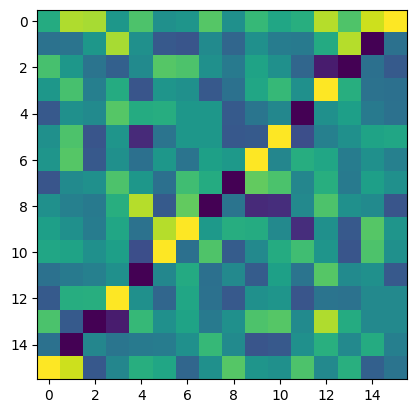

In [514]:
plt.imshow(mat.real)

In [501]:
from opttrot.pauli_utils import pstr2mat
from opttrot.utils import fro_inner

In [502]:
pstr2mat("II")

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])

In [506]:
for c, pstr in ppoly.terms:
    print(pstr)
    mat = np.matrix(pstr2mat(pstr))
    coef = fro_inner(pmat,mat)
    print("Cal:", c)
    print("Original", coef)

ZIZZ
Cal: 0.4544037194016307
Original (0.4544037194016307+0j)
ZIIY
Cal: 0.3781503078465426
Original 0.37815030784654247j
ZIZY
Cal: 0.6302642522987003
Original 0.6302642522987003j
ZZZX
Cal: 0.5209403571724263
Original (0.5209403571724263+0j)
ZIXI
Cal: 0.47346026337701774
Original (0.47346026337701774+0j)
ZIYI
Cal: 0.31720112937941924
Original 0.31720112937941924j
ZZXI
Cal: 0.680047206972493
Original (0.680047206972493+0j)
ZIXX
Cal: 0.1156697708409069
Original (0.1156697708409069+0j)
IYIZ
Cal: 0.8884091867136114
Original 0.8884091867136114j
ZYYZ
Cal: 0.09201203734550234
Original (-0.09201203734550234+0j)
ZXXY
Cal: 0.939888459320976
Original 0.939888459320976j
ZYXX
Cal: 1.977264449395434e-06
Original 1.977264449393168e-06j
XZZY
Cal: 0.21596305161704488
Original 0.21596305161704488j
YIZY
Cal: 0.46669177071699175
Original (-0.46669177071699175+0j)
YZYZ
Cal: 0.36959804664740653
Original (-0.36959804664740653+0j)
XZXY
Cal: 0.41148525073323194
Original 0.41148525073323194j
XZYX
Cal: 0.09044362